# Bike Sharing in Washington DC Data Analysis

Link to the data: https://www.kaggle.com/marklvl/bike-sharing-dataset

Data Collection Date: 2011 and 2012

Data Source: 'Capital Bikeshare' https://www.capitalbikeshare.com/system-data

Possible Questions to explore:

1. How do variables like time of day, season, and weekday/weekend affect the number of bike rentals in a day?

In [81]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [82]:
df = pd.read_csv('hour.csv')
df = df.rename(columns={'cnt': 'count'})
df['workingday'] = df['workingday'].replace({0: False, 1: True})

In [83]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,False,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,False,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,False,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,False,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,False,1,0.24,0.2879,0.75,0.0,0,1,1


Description of the data can be found here: https://www.kaggle.com/marklvl/bike-sharing-dataset

In [84]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## How many total rentals were there?

In [85]:
df['count'].sum()

3292679

## When were the peak hours for rentals?

In [86]:
hourlyCount = df[['hr', 'count']].groupby('hr').sum()

In [87]:
hourlyCount.head()

,count
hr,
0,39130
1,24164
2,16352
3,8174
4,4428


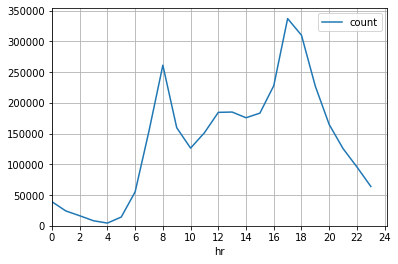

In [88]:
hourlyCount.plot(xticks=range(0, 25, 2), grid=True, xlim=0, ylim=0)

The peak hours for rentals was at 8 am and 5 pm. This makes sense as 8 am and 5 pm is usually the time for rush hour. These findings suggest that the most common usage of bike rentals is for commuting to work.

## Are there more bike rentals on a weekday vs weekend?

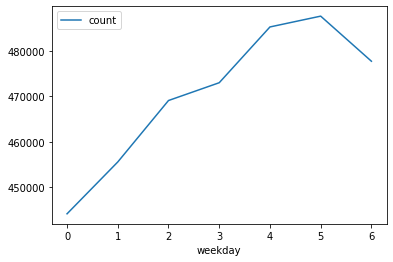

In [89]:
# 0 means Sunday, 1 means Monday, etc.

df[['weekday', 'count']].groupby('weekday').sum().plot(kind='line', rot=1)

We can use a hypothesis test to check if there is a significant difference. Technically since the data is taken from 2011 and 2012, it is not a simple random sample of all bike rides for this company.

Null hypothesis: There is no difference in bike rides per day on a weekday vs weekend. (proportion of rides = 0.5)

Alt hypothesis: There are more bike rides per day on a weekday. (proportion of rides > 0.5)

In [90]:
Create a weekdaybool column and add it to the data set

SyntaxError: invalid syntax (<ipython-input-90-4060e1ed4d45>, line 1)

In [92]:
counts = df[['weekday', 'count']].groupby('weekday').sum()
counts = counts.reset_index()

In [93]:
counts[(counts['weekday'] == 0) | (counts['weekday'] == 6)]

,weekday,count
0,0,444027
6,6,477807


In [94]:
# output of this function is (z-stat, p-value)
sm.stats.proportions_ztest(2292410, 2292410 + 1000269, 0.5, alternative='two-sided')

(774.1944548167168, 0.0)

The p-value is 0.0, so there is sufficient evidence to reject the null hypothesis that the proportion of bike rentals on a working day is 0.5. This finding shows that there are more bike rentals on a working day, which aligns with the previous finding that there are more bike rentals around rush hour.

In [ ]:
# single regression of temp vs num of rides
# mult regression predicting # of rides or something

## What is the relationship between temperature and number of rides on a day?

In [24]:
df[['dteday', 'temp', 'count']].head()

,dteday,temp,count
0,2011-01-01,0.24,16
1,2011-01-01,0.22,40
2,2011-01-01,0.22,32
3,2011-01-01,0.24,13
4,2011-01-01,0.24,1


According to the data source: "temp: Normalized temperature in Celsius. The values are derived via (t - tmin)/(tmax - tmin), tmin=-8, tmax=+39 (only in hourly scale)"

The data will be converted to farenheight for easier interpretation.

In [26]:
tmin = -8
tmax = 39

In [30]:
# temp in celsius, not normalized
celsius = (df['temp'] * (tmax - tmin)) + tmin

In [31]:
# temp in fahrenheight, not normalized
fahrenheit = (celsius * 1.8) + 32
fahrenheit

0        37.904
1        36.212
2        36.212
3        37.904
4        37.904
          ...  
17374    39.596
17375    39.596
17376    39.596
17377    39.596
17378    39.596
Name: temp, Length: 17379, dtype: float64

In [32]:
df['temp'] = fahrenheit

In [40]:
df[['dteday', 'hr', 'temp', 'count']].head(13)

,dteday,hr,temp,count
0,2011-01-01,0,37.904,16
1,2011-01-01,1,36.212,40
2,2011-01-01,2,36.212,32
3,2011-01-01,3,37.904,13
4,2011-01-01,4,37.904,1
5,2011-01-01,5,37.904,1
6,2011-01-01,6,36.212,2
7,2011-01-01,7,34.520,3
8,2011-01-01,8,37.904,8
9,2011-01-01,9,44.672,14


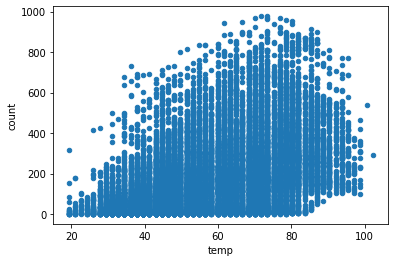

In [42]:
df[['temp', 'count']].plot(kind='scatter', x='temp', y='count')

We will try to fit the data using linear regression and possibly polynomial regression if a linear model is not a good fit.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [48]:
from sklearn.linear_model import LinearRegression

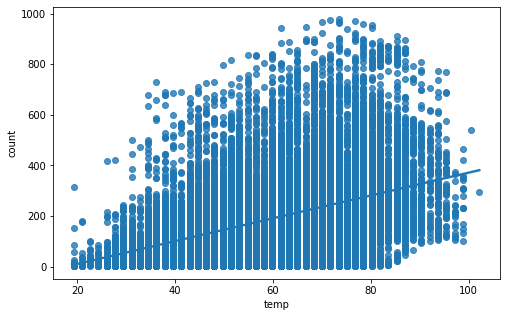

In [54]:
plt.figure(figsize=(8, 5))
sns.regplot(x='temp', y='count', data=df)

In [55]:
lm = LinearRegression()
X = df[['temp']]
Y = df['count']
lm.fit(X,Y)
lm.score(X,Y) #R-squared value

0.16384059523903416

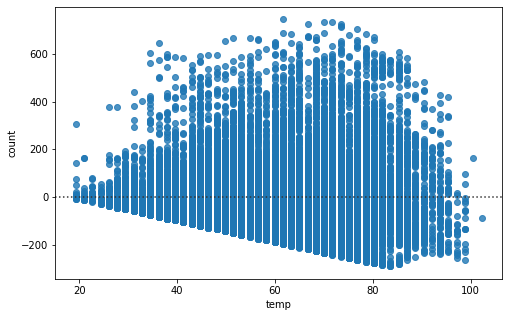

In [57]:
plt.figure(figsize=(8, 5))
sns.residplot(df['temp'], df['count'])

The linear model has an R-squared value of 0.16 and the residual plot does not show a random scatter making this linear model a poor fit for the data. A 2nd order polynomial regression may be more reasonable because people won't want to ride a bike if the weather is too cold or too hot.

In [65]:
coeff = np.polyfit(df['temp'], df['count'], 2)
pm = np.poly1d(poly)

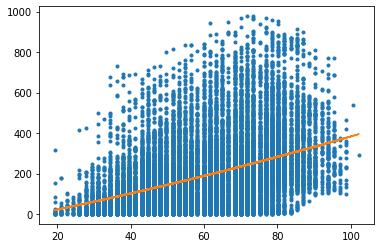

In [69]:
plt.plot(df['temp'], df['count'], '.', df['temp'], pm(df['temp']), '-')

In [ ]:
# split up for each season